# Titanic Survivors

## Introduction

The Titanic Survivors is a classic machine learning project. The goal is to predict if a passenger will survive the wreck based on the passengers attributes. This is a binary classification problem, where each passenger will either survive or die.

In [2]:
# loading the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import isnan

## Data Exploration

First, we will load the data and explore it. This will allow us to modify any data we might need to as well as remove any data. We can identify the discrete and continuous variables and decide how to deal with them. Essentially, we will get the data ready for modeling.

In [3]:
# loading the data
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


One of the easiest ways of getting a grasp on the data is to plot it. Histograms are an easy way to understand the data and the relationship each point has to one another. 

array([[<Axes: title={'center': 'Parch'}>]], dtype=object)

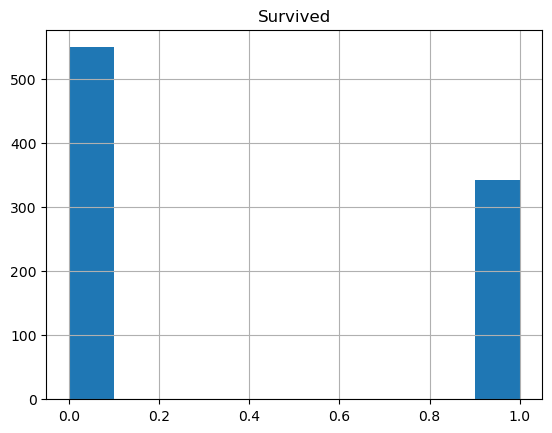

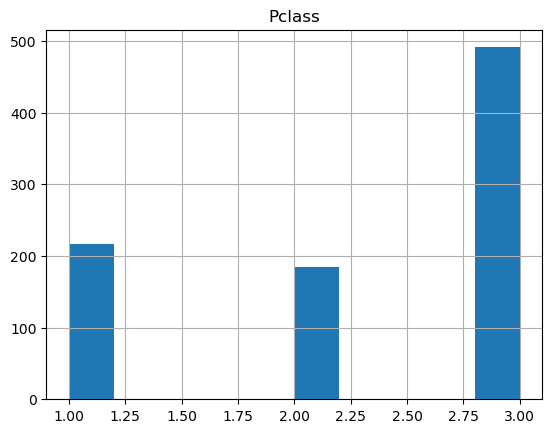

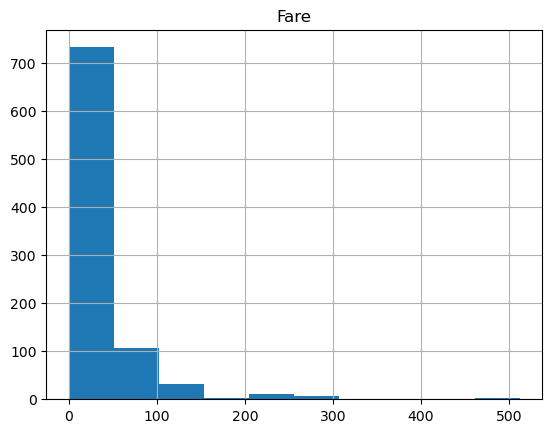

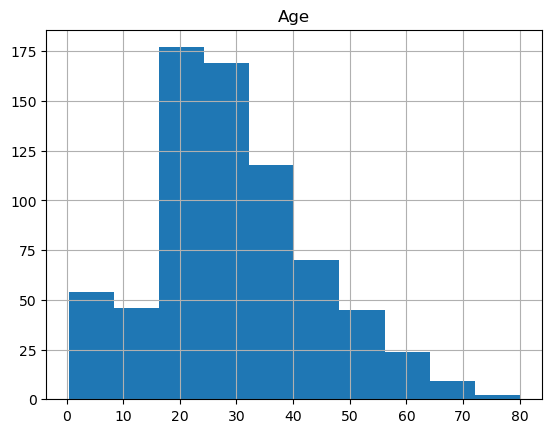

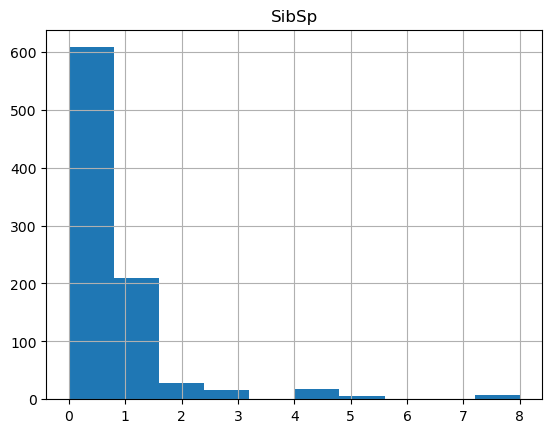

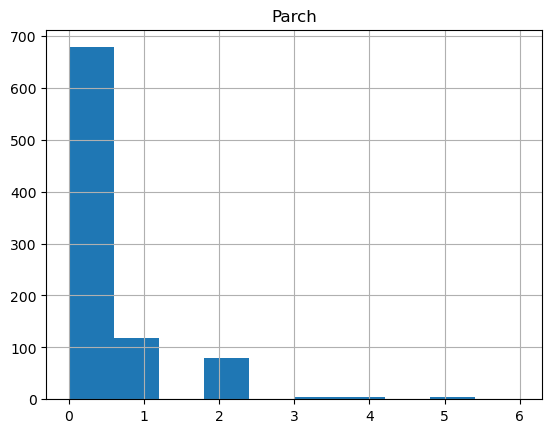

In [4]:
# data visualiztions
df.hist('Survived')
df.hist('Pclass')
df.hist('Fare')
df.hist('Age')
df.hist('SibSp')
df.hist('Parch')

It is helpful to have a normal distrubution for you data so that you can apply different statistcal principles. It will also help us with a more acurate prediction. Above, we can see that Fare, SibSp, and Parch are all skewed. Age looks relativly normal, so we will leave it how it is. The rest of the variables are discrete categories represented by numbers, so we should leave them be. 

Next, we can graph the logged variables of Fare, SibSp, and Parch to see if it creates a normal distribution. We will have to add 0.01 to each variable since log(0) is undefined and there are many instances of 0 in the dataset.

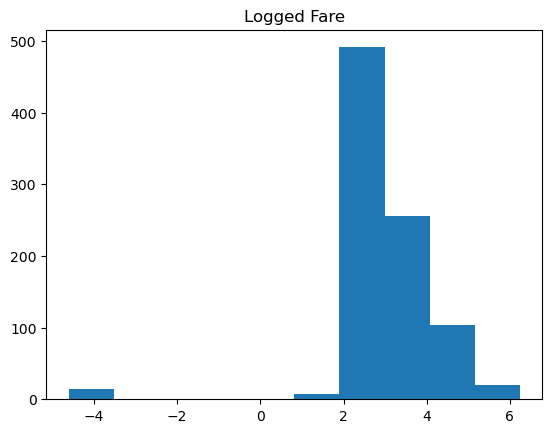

In [5]:
logFare = np.log(df.Fare+0.01)
plt.hist(logFare)
plt.title("Logged Fare")
plt.show()

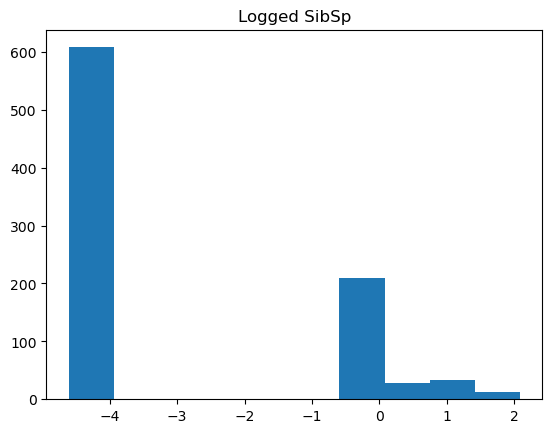

In [6]:
sibSp = np.log(df.SibSp+0.01)
plt.hist(sibSp)
plt.title("Logged SibSp")
plt.show()

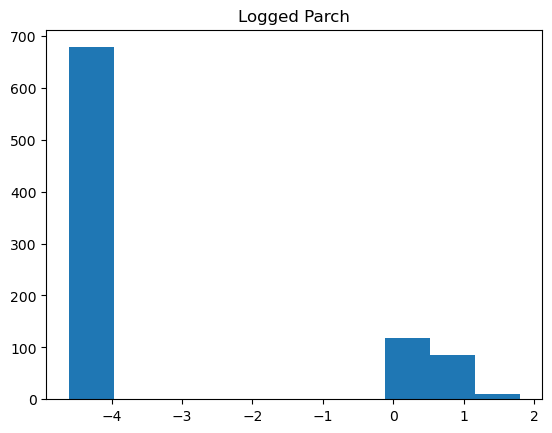

In [7]:
parch = np.log(df.Parch+0.01)
plt.hist(parch)
plt.title("Logged Parch")
plt.show()

It looks like Fare is the only variable that had the desired effect, so we will modify Fare in the dataset and leave SibSp and Parch alone.

## Feature Selection

Now, we need to prepare our data for modeling. This includes declaring our target variable and predictors, dealing with categorical variables, normalizing our data, deciding how to handle missing data, and creating our testing and training split.

In [8]:
df['Fare'] = np.log(df.Fare+0.1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.994700,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.268064,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.082562,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.974058,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.098018,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.572612,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.404525,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.159126,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.404525,C148,C


In [9]:
# the amount of missing data per column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


First, we will need to identify our target variable, Survived.

In [11]:
y = df['Survived']

Next, we will identify our predictors. To start out, this will be all other columns in the dataset. Logically, we can eliminate Ticket, Passenger ID, and Name. Looking at the number of missing data points, we will also eliminate Cabin. This is a tough decision, because one would think the cabin the passenger was in would likely have a big impact on the survival rate of the passenger, but if we were to fill it in with other data, it would likeley have a negative effect on our model. Note that we are still using Age and Fare as predictors even though they have missing data. We will address this next.

At this point, we can also deal with our categorical variables. Pclass is currently a number representing an order of the passenger's ticket class. This will need to be converted to a category, and then we will use one hot encoding to represent these categories in our dataset. 

In [12]:
df['Pclass'] = df['Pclass'].astype('category')

X = df.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])
X

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,1.994700,False,False,True,False,True,False,False,True
1,38.0,1,0,4.268064,True,False,False,True,False,True,False,False
2,26.0,0,0,2.082562,False,False,True,True,False,False,False,True
3,35.0,1,0,3.974058,True,False,False,True,False,False,False,True
4,35.0,0,0,2.098018,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.572612,False,True,False,False,True,False,False,True
887,19.0,0,0,3.404525,True,False,False,True,False,False,False,True
888,NaN,1,2,3.159126,False,False,True,True,False,False,False,True
889,26.0,0,0,3.404525,True,False,False,False,True,True,False,False


We now have our columns how we want them, we need to normalize the data. It is important for all variables to be on the same scale so that when we use our gradient descent algorithm for optimizing our models, we have a lower chance of getting stuck in trough or local minimum. We will use sklearn's standard scalar to do this.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Now we have our data ready to model, but we still have missing data in our age and fare columns. There are various ways we could handle this, but we will try to preserve the data we have since there is not much of it. Sklearn offers a really slick way to fill in missing data using nearest neighbors algorithm. This sets the missing data point as the target and uses the rest of the data points as the predictors for the missing data. This will fill in all the missing data in age and fare.

In [18]:
# imputing the data
from numpy import isnan
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights="uniform", metric = 'nan_euclidean')
imputer.fit(X)
X = imputer.transform(X)

print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 0


## Model Development

Now that all our data is clean and normalized, we can begin our modeling. We will begin with the null model then try to improve our predictions using the null as a baseline. 

First we will split our data into a training and testing set so we can evaluate our different models against eachother. We will reserve only 20% of our data for testing so we can leave most of it for training. We will set the random state so that the split will remain the same for comparison sake, but this is not necessary.

In [25]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Our null model is the simplest model we could possible make. In binary classification problems, it is often taking the mode and predicting that for all cases. 

In [28]:
# null model
from statistics import mode
nullOut = mode(ytrain)
print('nullOut = ',nullOut)

nullModel = [nullOut] *len(ytest)
print('null model = ',nullModel)

nullAccuracy = sum(ytest == nullOut)/len(ytest)
print('Null accuracy = ', nullAccuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, nullModel)

# the null model would be to assume that all the people on the ship die since the majority of the people on the ship did die.

nullOut =  0
null model =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Null accuracy =  0.5865921787709497


array([[105,   0],
       [ 74,   0]])

In this problem, that means since most people died, we would predict that everyone will die. This gives us a 58% accuracy that we will use as a benchmark for our next models. 

For the first model, we will use logistic regression. This is the simplest binary classification algorithm, and uses the sigmoid functioin to give a classification. 

In [29]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(Xtrain, ytrain)
print('Training score for logistic regression is', logModel.score(Xtrain, ytrain))
print('Testing score for logistic regression is', logModel.score(Xtest, ytest))


Training score for logistic regression is 0.8103932584269663
Testing score for logistic regression is 0.8100558659217877


Logistic regression gives us a training score gives us an accuracy of 81% and a testing score of 81%. This is a great improvement from our null model and will now be used as the benchmark for other models. The similarity between the training and testing score is a good sign meaning that we are not overfitting our model to the traning set.

In [39]:
# NEAREST NEIGHBORS MODEL
from sklearn.neighbors import KNeighborsClassifier
neighborsModel = KNeighborsClassifier()
neighborsModel.fit(Xtrain,ytrain)
print('training score for nearest neighbors = ',neighborsModel.score(Xtrain, ytrain))
print('testing score for nearest neighbors = ', neighborsModel.score(Xtest, ytest))

training score for nearest neighbors =  0.8651685393258427
testing score for nearest neighbors =  0.8379888268156425


For our nearest neighbors model, we have an accuracy score for our training score at 86% and a testing score of 83%. We will be comparing the testing scores to determine which model to use since that is how we will see how the model performs on data it has not seen before. 

To optimize our nearest neighbors model, we can adjust our hyperparameters. For nearest neighbors, this is the $k$ amount of neighbors it uses to predict the target. To optimize these, we will use a grid search with cross validation. This is a brute force method that will try all options we give it as well as cross validate them by using another testing/training split. 

In [52]:
from sklearn.model_selection import GridSearchCV
ParamGrid = {'n_neighbors': range(1,10)}
cvNeighModel = GridSearchCV(neighborsModel, ParamGrid, cv = 5)
cvNeighModel.fit(Xtrain, ytrain)
cvNeighModel.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [58]:
bestKnn = KNeighborsClassifier(n_neighbors = 4)
bestKnn.fit(Xtrain, ytrain)
neighborsScore = bestKnn.score(Xtest, ytest)
neighborsTrain = bestKnn.score(Xtrain, ytrain)
print(f"Training score for neighbors is {neighborsTrain}")
print(f"Testing score for neighbors is {neighborsScore}")

Training score for neighbors is 0.8553370786516854
Testing score for neighbors is 0.8156424581005587


With our tuned model, we actually get a lower testing score than the out-of-the-box model. This is an interesting case, but we should trust our tuned model more than the previous one. This model is more likely to do better on new data because it has actually been tested on 5 different testing sets, since we cross validated over 5 folds. 

Next, we will model using a decision tree.

In [75]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
ParamGrid = {'max_depth': range(1,11,1), 'max_features' : range(1,12,1)}
dcModel = DecisionTreeClassifier()
dcModel = GridSearchCV(dcModel, ParamGrid, cv = 5)
dcModel.fit(Xtrain,ytrain)
dcModel.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=11)

In [81]:
finalDcModel = DecisionTreeClassifier(max_depth=4, max_features=7)
finalDcModel.fit(Xtrain,ytrain)
dtScore = finalDcModel.score(Xtest,ytest)
print('Training score for decision tree is', finalDcModel.score(Xtrain, ytrain))
print(f"Testing score for decision tree is {dtScore}")

Training score for decision tree is 0.8384831460674157
Testing score for decision tree is 0.7988826815642458


The training score for the decision tree is 83% and the testing score is 79%. This is comparable to the other models with a much simpler algorithm and easier concept for non-data scientists to understand. 

For the final model, we will use a random forest. This is an ensemble model, meaning it uses multiple algorthims to make predictions. In this case, the random forest is created by multiple decision trees.

In [82]:
# random forest
from sklearn.ensemble import RandomForestClassifier
ParamGrid = {'n_estimators': range(1,25,1), 'max_depth' : range(1,20,1)}
rfModel = RandomForestClassifier()
rfModel = GridSearchCV(rfModel, ParamGrid, cv = 5)
rfModel.fit(Xtrain,ytrain)
rfModel.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=17)

In [84]:
finalRfModel = RandomForestClassifier(max_depth=7, n_estimators=17)
finalRfModel.fit(Xtrain,ytrain)
rfScore = finalRfModel.score(Xtrain,ytrain)
print(f'Training score for random forest is {rfScore}')
print('Testing score for random forest is', finalRfModel.score(Xtest, ytest))

Training score for random forest is 0.8778089887640449
Testing score for random forest is 0.8100558659217877


For the random forest, we grid searched over the hyperparameters of max depth and number of estimators. These are the two main parameters yet there are others which is why they may change each iteration.

We get a training score of 87% and testing score of 81% using the max depth of 7 and 17 estimators.

## Conclusion

To choose a model, we would evaluate the difference between testing and training score, the testing score itself, who our audience is, and what our goal is. For the Kaggle competition, we would probably want to use the most complex and detailed model that gets us the best results. If we were needing to present this to a group of data scientists, this may be accepted, but if we were to present this to a CEO who is not as familiar with the algorithms, this may not be the best choice.

To maximize understandability and results, I would use the decision tree classifier with a max depth of three and max features of 11. The decision tree produced a result of 79% accuracy which is much better than our null model of 58% accuracy. The decision tree is also easy to explain and easily understandable by non-data scientists.